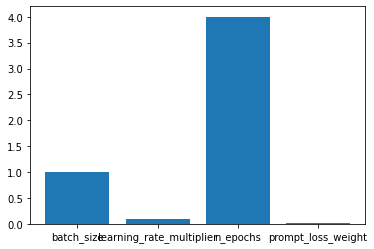

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON data into a Python object
data = json.loads("{\"created_at\": 1669143727,\"fine_tuned_model\": \"davinci:ft-personal-2022-11-22-21-04-53\",\"hyperparams\": {\"batch_size\": 1,\"learning_rate_multiplier\": 0.1,\"n_epochs\": 4,\"prompt_loss_weight\": 0.01},\"id\": \"ft-RGN7XHkQPVmuUSPbb7YG4zda\",\"model\": \"davinci\",\"object\": \"fine-tune\",\"organization_id\": \"org-UA0xqHRa8sJZiblAwTQ6C0kt\",\"result_files\": [{\"bytes\": 107796,\"created_at\": 1669151095,\"filename\": \"compiled_results.csv\",\"id\": \"file-xbSCXJFWJTEr5Ne2QbfwMUN2\",\"object\": \"file\",\"purpose\": \"fine-tune-results\",\"status\": \"processed\",\"status_details\": null}],\"status\": \"succeeded\",\"training_files\": [{\"bytes\": 568893,\"created_at\": 1669143723,\"filename\": \"example_train_prepared.jsonl\",\"id\": \"file-nH36yEO3lsVTEoofQ1QmjMqp\",\"object\": \"file\",\"purpose\": \"fine-tune\",\"status\": \"processed\",\"status_details\": null}],\"updated_at\": 1669151095,\"validation_files\": [{\"bytes\": 401392,\"created_at\": 1669143727,\"filename\": \"example_validation_prepared.jsonl\",\"id\": \"file-NSHsCurfdf7ihZmNdJCmdXmT\",\"object\": \"file\",\"purpose\": \"fine-tune\",\"status\": \"processed\",\"status_details\": null}]}")

# Extract the hyperparameters from the JSON data
batch_size = data['hyperparams']['batch_size']
learning_rate_multiplier = data['hyperparams']['learning_rate_multiplier']
n_epochs = data['hyperparams']['n_epochs']
prompt_loss_weight = data['hyperparams']['prompt_loss_weight']

# Create a list of the hyperparameters
hyperparams = [batch_size, learning_rate_multiplier, n_epochs, prompt_loss_weight]

# Create a list of the hyperparameter names
hyperparam_names = ['batch_size', 'learning_rate_multiplier', 'n_epochs', 'prompt_loss_weight']

# Create a bar graph of the hyperparameters
plt.bar(hyperparam_names, hyperparams)
plt.show()


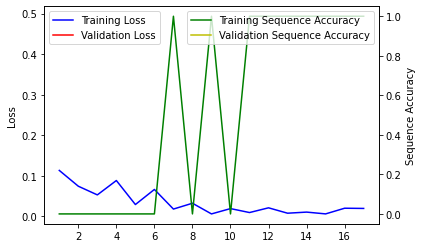

In [ ]:
import matplotlib.pyplot as plt

# Data
steps = [i for i in range(1, 18)]
training_loss = [0.113503868134496, 0.0745849757946455, 0.0532221682766566, 0.0886128272311163, 0.0294547074381965, 0.0666500272092219, 0.018294738624273, 0.0326645254992553, 0.00635636508243152, 0.0194682271687814, 0.00973232916588536, 0.0213782167385014, 0.00810845594830153, 0.010824551640359, 0.00641220797419131, 0.020386791810267, 0.0198714041643729]
validation_loss = [0.493259494011258, None, None, None, None, None, None, None, 0.0871569393571882, None, None, None, None, None, None, None, 0.340534550387619]
training_sequence_accuracy = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
validation_sequence_accuracy = [0, None, None, None, None, None, None, None, 0, None, None, None, None, None, None, None, 0]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot training and validation loss
ax1.plot(steps, training_loss, 'b-', label='Training Loss')
ax1.plot(steps, validation_loss, 'r-', label='Validation Loss')

# Set y-axis label
ax1.set_ylabel('Loss')

# Create second y-axis for sequence accuracy
ax2 = ax1.twinx()

# Plot training and validation sequence accuracy
ax2.plot(steps, training_sequence_accuracy, 'g-', label='Training Sequence Accuracy')
ax2.plot(steps, validation_sequence_accuracy, 'y-', label='Validation Sequence Accuracy')

# Set y-axis label
ax2.set_ylabel('Sequence Accuracy')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set x-axis label
plt.xlabel('Steps')

# Show plot
plt.show()


[0.49325949 0.         0.         ... 0.         0.         0.42809087]
[0.58823529 0.         0.         ... 0.         0.         0.52631579]


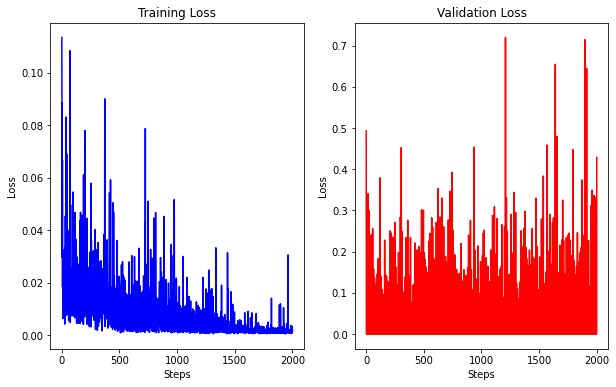

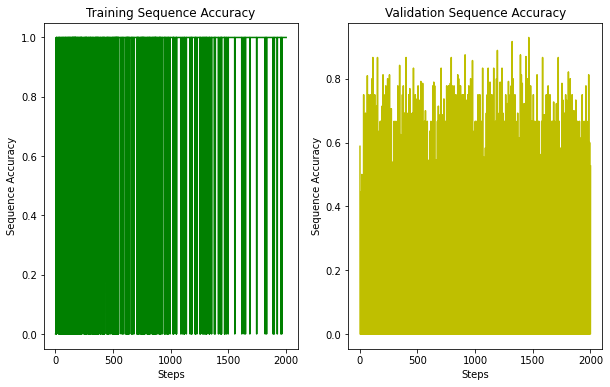

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('/content/compiled_results.csv')

# Extract data from DataFrame
steps = data['step']
training_loss = data['training_loss']
validation_loss = data['validation_loss']
validation_loss = np.array(validation_loss)
validation_loss[np.isnan(validation_loss)] = 0
print(validation_loss)

training_sequence_accuracy = data['training_sequence_accuracy']
validation_sequence_accuracy = data['validation_token_accuracy']

validation_sequence_accuracy = np.array(validation_sequence_accuracy)
validation_sequence_accuracy[np.isnan(validation_sequence_accuracy)] = 0
print(validation_sequence_accuracy)

# Create figure and axis for Loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6)) # set the size of the figure

# Plot training and validation loss
ax1.plot(steps, training_loss, 'b-', label='Training Loss')
ax1.set_title('Training Loss')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss')

ax2.plot(steps, validation_loss, 'r-', label='Validation Loss')
ax2.set_title('Validation Loss')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Loss')

# Create figure and axis for Sequence Accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot training and validation sequence accuracy
ax1.plot(steps, training_sequence_accuracy, 'g-', label='Training Sequence Accuracy')
ax1.set_title('Training Sequence Accuracy')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Sequence Accuracy')

ax2.plot(steps, validation_sequence_accuracy, 'y-', label='Validation Sequence Accuracy')
ax2.set_title('Validation Sequence Accuracy')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Sequence Accuracy')

# Show plots
plt.show()




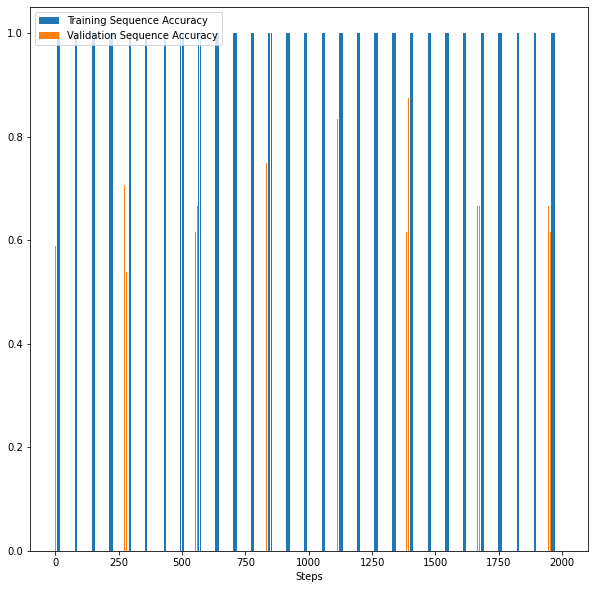

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('/content/compiled_results.csv')

# Extract data from DataFrame
steps = data['step']
training_loss = data['training_loss']
validation_loss = data['validation_loss']
validation_loss = np.array(validation_loss)
validation_loss[np.isnan(validation_loss)] = 0

training_sequence_accuracy = data['training_sequence_accuracy']
validation_sequence_accuracy = data['validation_token_accuracy']
validation_sequence_accuracy = np.array(validation_sequence_accuracy)
validation_sequence_accuracy[np.isnan(validation_sequence_accuracy)] = 0

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Set the width of the bars
barWidth = 0.2

# Plot the data for Loss
# loss = np.array([training_loss, validation_loss])
# loss = np.transpose(loss)
# loss_bar = ax.bar(steps, loss[:,0], barWidth, label='Training Loss')
# loss_bar = ax.bar(steps + barWidth, loss[:,1], barWidth, label='Validation Loss')

# Plot the data for Sequence Accuracy
accuracy = np.array([training_sequence_accuracy, validation_sequence_accuracy])
accuracy = np.transpose(accuracy)
accuracy_bar = ax.bar(steps + 2*barWidth, accuracy[:,0], barWidth, label='Training Sequence Accuracy')
accuracy_bar = ax.bar(steps + 3*barWidth, accuracy[:,1], barWidth, label='Validation Sequence Accuracy')

# Add legend
ax.legend()

# Set x-axis label
plt.xlabel('Steps')

# Show plot
plt.show()
